In [77]:
#!pip install neurokit2

In [78]:
import pandas as pd
import numpy as np
import neurokit2 as nk

In [79]:
#Task 1, 2 & 3
data_set = 10 * np.random.random(size=(10000, 5))          #Creating the 5 x 10,000 matrix
column_names = [['ch_1', 'ch_2', 'ch_3', 'ch_4', 'ch_5']]  #Creating the column list
time_series = np.linspace(0, 10*60, 10000)                 #Creating the index list (in seconds)
df=pd.DataFrame(
                data_set,                                  #Data to be transformed into dataset
                columns = column_names,                    #Columns
                index = pd.Index(time_series)              #Index
                )
df.index.name = 'time (s)'                                 #Labeling index
print(df, "Data Set")

                ch_1      ch_2      ch_3      ch_4      ch_5
time (s)                                                    
0.000000    2.344629  8.077502  4.958169  9.619302  8.734458
0.060006    1.976756  5.461985  4.614225  0.207767  3.838944
0.120012    5.454112  3.678525  8.774977  6.014733  4.633951
0.180018    2.094261  8.222373  0.664235  6.693184  7.738126
0.240024    7.871365  9.484680  0.382623  7.905728  8.426093
...              ...       ...       ...       ...       ...
599.759976  7.396097  5.504310  4.512108  9.822658  5.442925
599.819982  7.862535  1.169090  4.514161  1.926814  7.293301
599.879988  0.492072  0.052740  9.715032  1.032819  8.494476
599.939994  3.455912  6.379616  1.928720  0.700686  9.694297
600.000000  4.696247  1.821288  7.715763  8.309841  3.639453

[10000 rows x 5 columns] Data Set


In [80]:
#Task 4
num_triggers = 7        #Number of triggers
interval = 60           #Time interval between triggers
jitter_deviation = 2    #Jitter deviation

#Create vector with trigger + jitter -> np.full then np.cumsum -> triggers happening every 60 s + take the cumulative sum
trigger_times = np.cumsum(np.full(num_triggers, interval)) + np.random.uniform(-jitter_deviation, jitter_deviation, size=num_triggers) 
print(trigger_times,"trigger timestamps in seconds")

trigger_times = trigger_times * 1000/60    #There is 10,000 points in 10 min -> 600 s -> 1,000 data points in 60 seconds
trigger_times = trigger_times.astype(int)  #Save triggers as integers since they will be used as index points and we only have integer indexes
print(trigger_times,"trigger timestamps in points")

vector = np.zeros(10000)    #Create a vector of zeros
vector[trigger_times] = 1   #Set the trigger points to 1

[ 58.61435887 119.02858572 178.06139996 240.09763429 298.99379149
 359.09830736 421.76637512] trigger timestamps in seconds
[ 976 1983 2967 4001 4983 5984 7029] trigger timestamps in points


In [81]:
#Task 5
events = pd.DataFrame({'events': vector}, index=time_series) #Events saved as a dataframe
df = pd.concat([events, df], axis=1) 

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

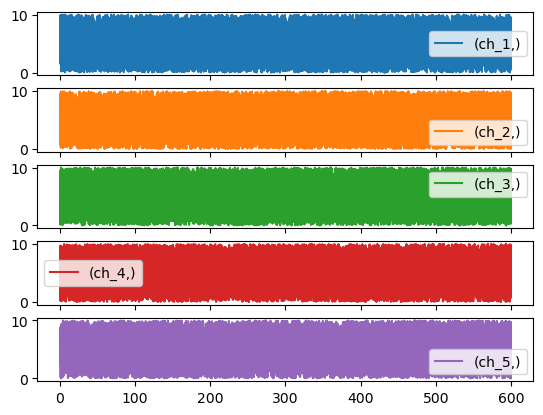

In [98]:
#Task 6
df[[('ch_1',),('ch_2',),('ch_3',),('ch_4',),('ch_5',),]].plot(subplots = True)

In [99]:
#Task 7
timestamps = np.round(df.index[df['events'] == 1], 2) #Looking for trigger points (Some offset due to changing from s to points)
timestamps

Float64Index([58.57, 118.99, 178.04, 240.08, 299.01, 359.08, 421.78], dtype='float64')

In [100]:
#Find epochs limits
epochs = np.zeros(shape=[2,7])
epochs[0:] = np.round(timestamps[0:7] - 2, 2) #Stablishing lower limit (2s before)
epochs[1:] = np.round(timestamps[0:7] + 3, 2) #Stablishing upper limit (3s after)
epochs

array([[ 56.57, 116.99, 176.04, 238.08, 297.01, 357.08, 419.78],
       [ 61.57, 121.99, 181.04, 243.08, 302.01, 362.08, 424.78]])

C:\Users\sears\AppData\Local\Temp\ipykernel_17076\1897975335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfepoch['mean'] = dfepoch.mean(axis=1)                 #Compute the mean
C:\Users\sears\anaconda3\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)
C:\Users\sears\AppData\Local\Temp\ipykernel_17076\1897975335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

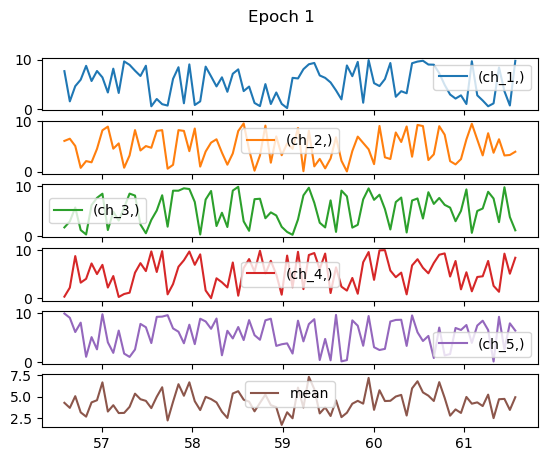

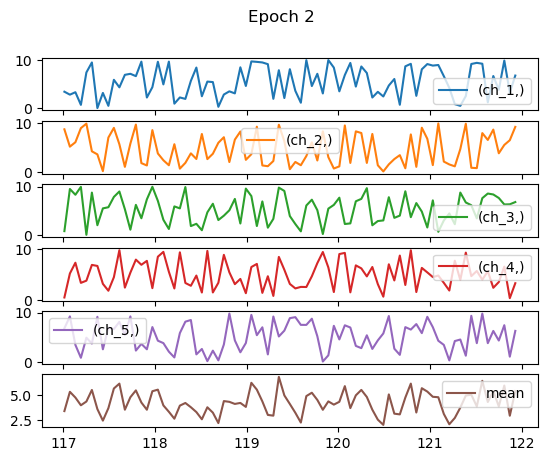

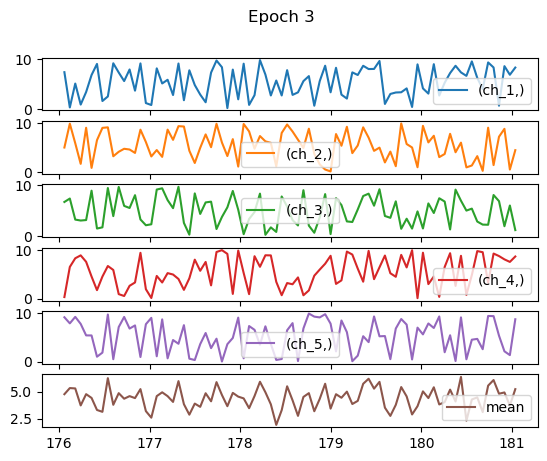

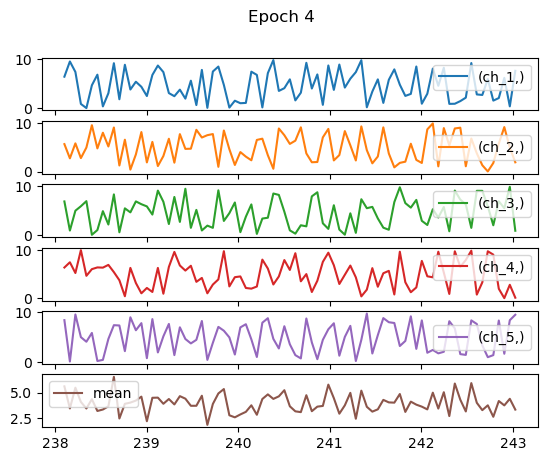

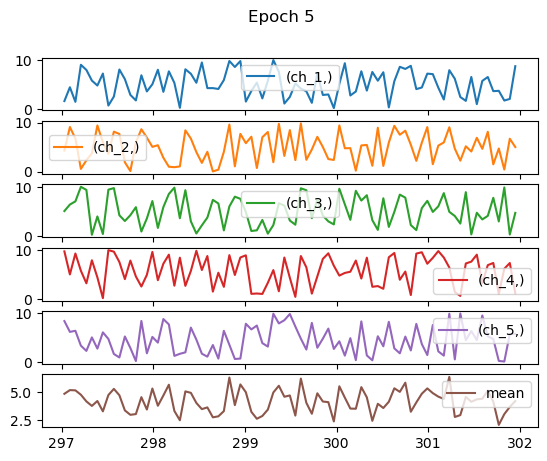

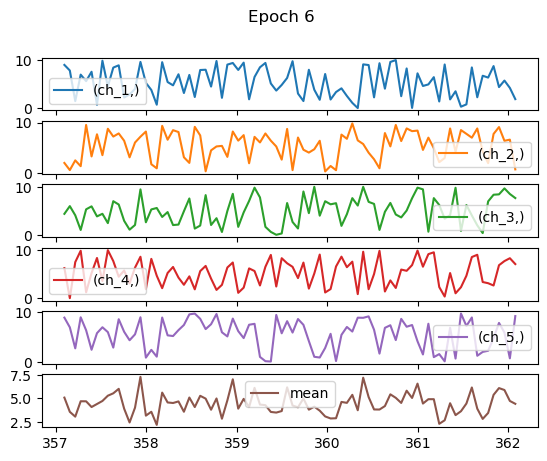

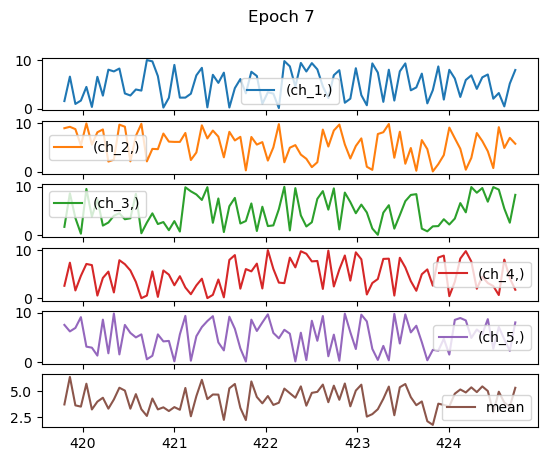

In [104]:
#Average of channels in each epoch
for u in range(epochs.shape[1]):
    dfepoch = df.loc[epochs[0,u]:epochs[1,u],:]               #Stablish limits and extract between the range
    dfepoch['mean'] = dfepoch.mean(axis=1)                 #Compute the mean
    dfepoch[[('ch_1',),('ch_2',),('ch_3',),('ch_4',),('ch_5',),'mean']].plot(subplots = True, title = 'Epoch '+ str(u+1)) #Plot